## Differential Expression Analysis - RhithroLoxo

First, make sure you're actually running this from a compute node, not the login. Logins are pn001 and 002. All others are higher.

In [1]:
Sys.info()

sysname                               release 
                              "Linux"           "3.10.0-693.2.2.el7.x86_64" 
                              version                              nodename 
"#1 SMP Tue Sep 12 22:26:13 UTC 2017"                               "pn039" 
                              machine                                 login 
                             "x86_64"                             "unknown" 
                                 user                        effective_user 
                            "ztobias"                             "ztobias"

Now load in the packages.

In [2]:
require(DESeq2)
require(ggplot2)
require(apeglm)

Loading required package: DESeq2
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Attaching p

Now import the count data, rounding decimals to integers

In [3]:
path_to_main <- "/vortexfs1/scratch/ztobias/RhithroLoxo_DE/" #change accordingly based on parent file structure
path_to_counts <- "outputs/quant/salmon.isoform.counts.matrix"
path <- paste(path_to_main,path_to_counts,sep="")
all_counts <- read.table(path,header=TRUE)
all_counts <- round(all_counts)

Take a look.

In [4]:
head(all_counts)
dim(all_counts)

,AP_C_1,AP_C_2,AP_C_3,AP_C_4,AP_C_5,AP_C_6,AP_P_1,AP_P_2,AP_P_3,AP_P_6,...,NJ_P_7,SC_C_12,SC_C_14,SC_C_2,SC_C_6,SC_C_7,SC_C_9,SC_P_1,SC_P_2,SC_P_3
TRINITY_DN2522_c0_g1_i3,5001,10642,9041,15797,11214,2686,3063,7965,528,9847,...,8033,13728,4990,3015,9699,6110,14936,11409,1086,5632
TRINITY_DN68400_c0_g1_i1,4,30,56,49,39,19,45,31,82,39,...,29,48,51,20,32,71,63,25,23,19
TRINITY_DN140775_c0_g1_i1,4,0,2,0,0,0,0,0,0,2,...,1,1,0,1,1,0,0,2,0,1
TRINITY_DN75566_c0_g1_i1,14,122,104,77,137,110,57,59,71,22,...,42,50,88,85,116,94,68,27,97,28
TRINITY_DN88538_c0_g1_i1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRINITY_DN71982_c0_g1_i1,7,7,20,19,12,13,6,8,27,10,...,8,17,14,6,5,14,12,7,15,9


[1] 149511     81

Read in the sample metadata and have a look.

In [5]:
path_to_meta <- paste(path_to_main,"metadata/DESeq2_coldata.txt",sep="")
coldata <- read.table(path_to_meta,header=FALSE,row.names=1)
colnames(coldata) <- c("site","condition","range","sex")
head(coldata)
dim(coldata)

,site,condition,range,sex
AP_C_1,AP,C,Native,F
AP_C_2,AP,C,Native,F
AP_C_3,AP,C,Native,M
AP_C_4,AP,C,Native,M
AP_C_5,AP,C,Native,M
AP_C_6,AP,C,Native,M


[1] 81  4

Make sure the two matrices contain all of the same samples and are in order.

In [6]:
all(rownames(coldata) == colnames(all_counts))

[1] TRUE

In [7]:
dds <- DESeqDataSetFromMatrix(countData = all_counts, colData = coldata, design = ~ condition)

converting counts to integer mode


In [8]:
library("BiocParallel")
register(MulticoreParam(8))
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 18094 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [16]:
res <- results(dds, alpha=0.05)
res

log2 fold change (MLE): condition P vs C 
Wald test p-value: condition P vs C 
DataFrame with 149511 rows and 6 columns
                                    baseMean       log2FoldChange
                                   <numeric>            <numeric>
TRINITY_DN2522_c0_g1_i3     5991.29432920851   -0.155483736291063
TRINITY_DN68400_c0_g1_i1    30.1494058582147     0.47367868157792
TRINITY_DN140775_c0_g1_i1   1.00391257995724   -0.243285189994498
TRINITY_DN75566_c0_g1_i1    69.2360126673168   0.0570142682338935
TRINITY_DN88538_c0_g1_i1  0.0623030912192727    0.294866934453428
...                                      ...                  ...
TRINITY_DN24218_c0_g1_i1     61.125541818803 -0.00987707947199641
TRINITY_DN144968_c0_g1_i1   1.04133797109394   -0.950629878155857
TRINITY_DN8739_c0_g1_i1     843.922469900028  -0.0624797677392558
TRINITY_DN131036_c0_g1_i1   56.8732136460134    0.184169444340497
TRINITY_DN46128_c0_g1_i1    7.69565305891964   -0.970435800182563
                      

In [10]:
resLFC <- lfcShrink(dds, coef="condition_P_vs_C", type="apeglm")

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895


In [17]:
summary(res)


out of 148816 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 1250, 0.84%
LFC < 0 (down)     : 1127, 0.76%
outliers [1]       : 0, 0%
low counts [2]     : 43963, 30%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



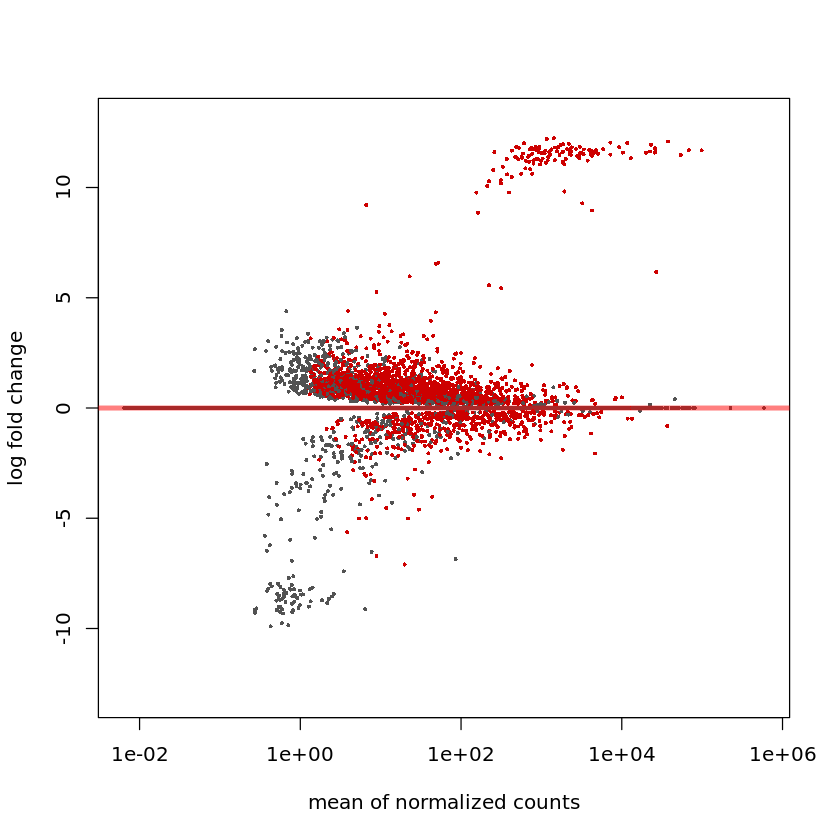

In [27]:
plotMA(resLFC, ylim=c(-13,13))

The cloud of extremely over-expressed transcripts is most likely a result of latent contamination. I observed this the first time I did this analysis. I was hoping that the additional contaminant filtering steps would help, but it appears not. Perhaps instead of blasting to the Loxo txm for pulling out reads before assembly, perhaps we can just blast against the raw Loxo reads. Would help ID things that didn't make it into the Loxo assembly, but there are still probably Loxo reads that would make it into the Rhithro assembly becuase the loxo reads are from the externae, not the root system. Even though the rhithro assembly was made from just clean crabs, there are loxo reads in it. This must be due to some latent infection or index hopping during sequencing. 

One approach could be to just remove all significant transcripts that are more overexpressed than the most underexpressed significant transcript. A little ad hoc, but could help with this issue, especially downstream with WGCNA. 

Now to check out a multi-factor design, analyzing both range and condition. 

In [82]:
vsd <- vst(dds)

In [85]:
library("RColorBrewer")
library("pheatmap")
sampleDists <- dist(t(assay(vsd)))
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$condition, vsd$range, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

ERROR: Error in library("pheatmap"): there is no package called ‘pheatmap’


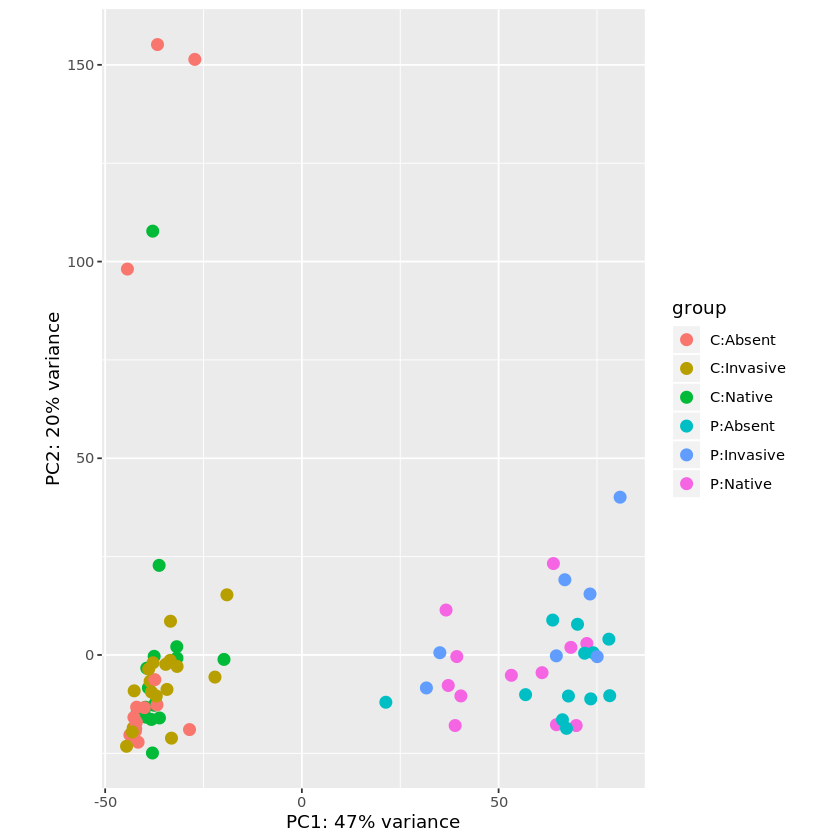

In [83]:
plotPCA(vsd, intgroup=c("condition", "range"))

In [65]:
ddsMF <- dds

Let's remove the Fort Pierce (FP) samples because the invasive status of Loxo is unresolved there. FP are in rows 11-22. 

In [66]:
ddsMF_noFP <- ddsMF[,-c(11:22)]
ddsMF_noFP

class: DESeqDataSet 
dim: 149511 69 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(149511): TRINITY_DN2522_c0_g1_i3 TRINITY_DN68400_c0_g1_i1 ...
  TRINITY_DN131036_c0_g1_i1 TRINITY_DN46128_c0_g1_i1
rowData names(23): baseMean baseVar ... maxCooks replace
colnames(69): AP_C_1 AP_C_2 ... SC_P_2 SC_P_3
colData names(6): site condition ... sizeFactor replaceable

Now you can see that we only have 69 samples, after removing the 12 from FP. 

In [73]:
ddsMF_noFP$group <- factor(paste0(ddsMF_noFP$range, ddsMF_noFP$condition)) 
ddsMF_noFP$group

[1] NativeC   NativeC   NativeC   NativeC   NativeC   NativeC   NativeP  
 [8] NativeP   NativeP   NativeP   NativeC   NativeC   NativeC   NativeC  
[15] NativeC   NativeC   NativeP   NativeP   AbsentC   AbsentC   AbsentC  
[22] InvasiveC InvasiveC InvasiveP InvasiveC InvasiveC InvasiveC InvasiveP
[29] InvasiveC InvasiveC InvasiveC InvasiveC InvasiveC InvasiveC InvasiveP
[36] InvasiveP AbsentC   AbsentC   AbsentC   AbsentC   AbsentC   AbsentC  
[43] AbsentP   AbsentP   AbsentP   AbsentP   AbsentP   AbsentP   AbsentC  
[50] AbsentC   AbsentC   AbsentC   AbsentC   AbsentC   AbsentP   AbsentP  
[57] AbsentP   AbsentP   AbsentP   AbsentP   InvasiveC InvasiveC InvasiveC
[64] InvasiveC InvasiveC InvasiveC InvasiveP InvasiveP InvasiveP
Levels: AbsentC AbsentP InvasiveC InvasiveP NativeC NativeP

In [74]:
design(ddsMF_noFP) <- ~ group
ddsMF_noFP <- DESeq(ddsMF_noFP)

using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 12266 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [77]:
resMF_noFP <- results(ddsMF_noFP, alpha=0.05)
resMF_noFP
summary(resMF_noFP)

log2 fold change (MLE): group NativeP vs AbsentC 
Wald test p-value: group NativeP vs AbsentC 
DataFrame with 149511 rows and 6 columns
                                    baseMean     log2FoldChange
                                   <numeric>          <numeric>
TRINITY_DN2522_c0_g1_i3     6130.46736837643  0.197986920677313
TRINITY_DN68400_c0_g1_i1      28.99232254402   1.49194324768313
TRINITY_DN140775_c0_g1_i1   1.04073114649582  0.205046811298963
TRINITY_DN75566_c0_g1_i1    67.4701849518878 -0.193809975013515
TRINITY_DN88538_c0_g1_i1  0.0731384114313201 -0.802580660941875
...                                      ...                ...
TRINITY_DN24218_c0_g1_i1    61.1680868224187  0.246470004796439
TRINITY_DN144968_c0_g1_i1   1.15798708783082   1.05979257963071
TRINITY_DN8739_c0_g1_i1     855.379171048832   0.15285016051543
TRINITY_DN131036_c0_g1_i1   55.8425836148422  0.342836223117198
TRINITY_DN46128_c0_g1_i1    7.96024834561026 -0.918292432810512
                                


out of 148998 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 5114, 3.4%
LFC < 0 (down)     : 6340, 4.3%
outliers [1]       : 289, 0.19%
low counts [2]     : 29331, 20%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [80]:
resultsNames(ddsMF_noFP)

[1] "Intercept"                  "group_AbsentP_vs_AbsentC"  
[3] "group_InvasiveC_vs_AbsentC" "group_InvasiveP_vs_AbsentC"
[5] "group_NativeC_vs_AbsentC"   "group_NativeP_vs_AbsentC"